## AUTHOR : DHANRAJ SHETTY

### Technical Task-3: Exploratory Data Analysis-Retail  (level-Begineer)

In [1]:
#Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
from plotnine import *

#### STEP-1 : Reading the Dataset

In [59]:
df = pd.read_csv('SampleSuperstore.csv') 

In [3]:
df.head()  #Loads the first 5 rows

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.tail()     #Loads the Last 5 rows

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [56]:
df.shape    #Number of elements in each dimention of an array

(9994, 13)

#### Step 2: Data Preprocessing

In [60]:
df.info()    #Returns the concise summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [61]:
df.describe()         #Gives Statistical data

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [62]:
df.isnull().sum()      #Checks the missing values

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

#### Step-3 : Checking for the Duplicate data 

In [64]:
df.duplicated().sum()      #Checks the duplicate data

17

In [10]:
df.drop_duplicates()      

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [65]:
df.nunique()            #Displaying Unique data

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

### Step 4 : Dropping irrelevant columns

In [12]:
#Deleting the column
col = ['Postal Code']
df1 = df.drop(columns=col,axis=1)

#### Step-5 : Checking Statistical relation between the Various rows & columns 

In [66]:
# covariance of columns
df1.cov()

,Sales,Quantity,Discount,Profit
Sales,388434.455308,278.459923,-3.627228,69944.096586
Quantity,278.459923,4.951113,0.003961,34.534769
Discount,-3.627228,0.003961,0.042622,-10.615173
Profit,69944.096586,34.534769,-10.615173,54877.798055


In [14]:
df1.head() #Loads First Five rows

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [15]:
df1.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


###  STEP-6 DATA VISUALIZATION

<AxesSubplot:>

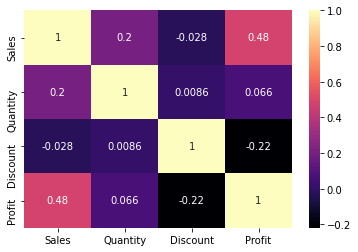

In [16]:
sns.heatmap(df1.corr(), annot = True, cmap = 'magma')

*From the above heatmap, we get the following observations*


**1.) Sales and profit are moderately correlated**

**2.) Discount and profit are negatively correlated**

<function matplotlib.pyplot.show(close=None, block=None)>

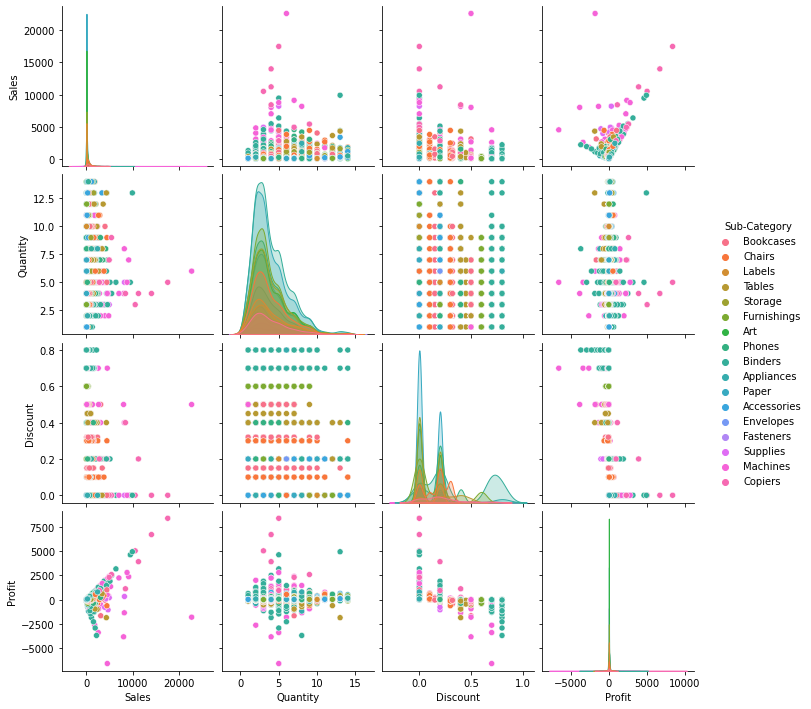

In [17]:
figsize=(15,10)
sns.pairplot(df1,hue='Sub-Category')
plt.show

#### CATEGORY WISE SALES DISCOUNT PROFIT ANALYSIS

In [18]:
#Counting Total no of Category
df_Category = df.groupby(['Category'])[['Sales', 'Discount', 'Profit']].mean()
df_Category = df_Category.sort_values('Profit')
df_Category

,Sales,Discount,Profit
Category,,,
Furniture,349.834887,0.173923,8.699327
Office Supplies,119.324101,0.157285,20.327050
Technology,452.709276,0.132323,78.752002


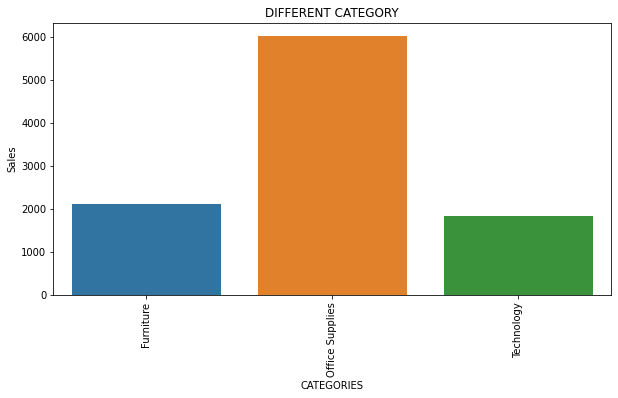

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(x=df1['Category'])
plt.xticks(rotation=90)
plt.title("DIFFERENT CATEGORY")
plt.xlabel("CATEGORIES")
plt.ylabel("Sales")
plt.show()

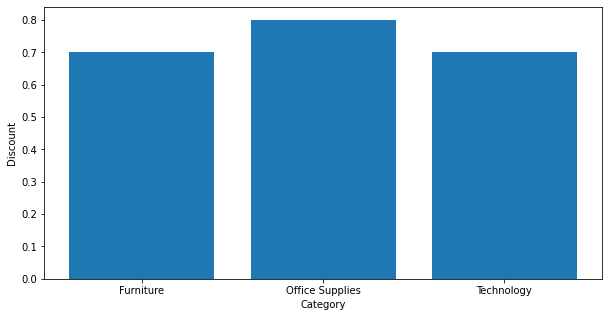

In [20]:
plt.figure(figsize=(10,5))
plt.bar('Category','Discount',data=df1)
# plt.title('Category vs Sub Category')
plt.xlabel('Category')
plt.ylabel('Discount')
plt.xticks(rotation=0)
plt.show()

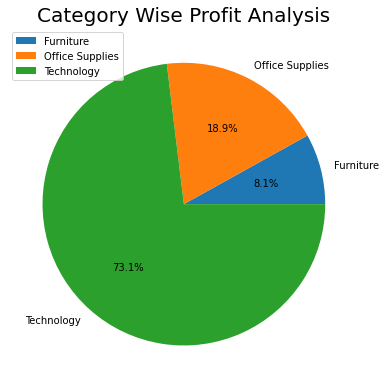

In [21]:
plt.figure(figsize = (6.5,6.5))
plt.pie(df_Category['Profit'], labels = df_Category.index, autopct = '%1.1f%%')
plt.title('Category Wise Profit Analysis', fontsize = 20)
plt.legend()
plt.xticks(rotation = 90)
plt.show()

**'Technology' Category here has 73.1% Profit holding, which is highest among other categories. Furniture has the least comprising 8.1%.**

**'Technology' Category here has 49.1% Sales holding, which is highest among other categories. Least is 'Office Supplies' comprsing of 12.9%.**

**'Furniture' Category here has 17.4% Discount holding, which is highest among other categories. Least stays 'Technology' having 13.2%.**

#### SUB CATEGORY WISE SALES DISCOUNT PROFIT ANALYSIS

In [22]:
df_sub_category = df.groupby('Sub-Category')[['Profit', 'Sales', 'Discount']].mean()
df_sub_category

,Profit,Sales,Discount
Sub-Category,,,
Accessories,54.111788,215.974604,0.078452
Appliances,38.922758,230.755710,0.166524
Art,8.200737,34.068834,0.074874
Binders,19.843574,133.560560,0.372292
Bookcases,-15.230509,503.859633,0.211140
Chairs,43.095894,532.332420,0.170178
Copiers,817.909190,2198.941618,0.161765
Envelopes,27.418019,64.867724,0.080315
Fasteners,4.375660,13.936774,0.082028


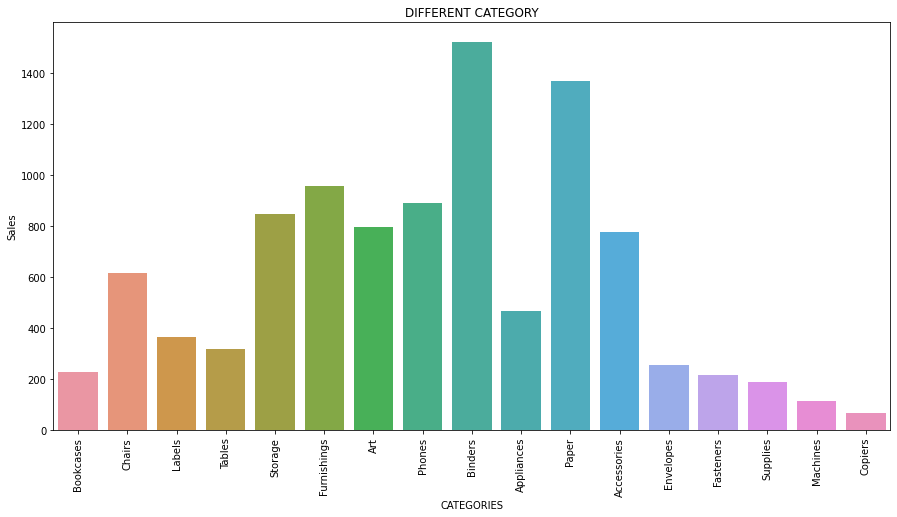

In [23]:
plt.figure(figsize=(15,7.5))
sns.countplot(x=df1['Sub-Category'])
plt.xticks(rotation=90)
plt.title("DIFFERENT CATEGORY")
plt.xlabel("CATEGORIES")
plt.ylabel("Sales")
plt.show()

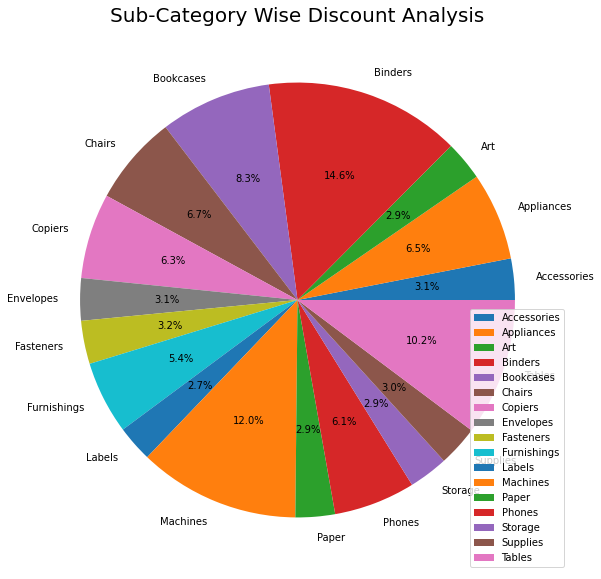

In [24]:

plt.figure(figsize = (10,10))
plt.pie(df_sub_category['Discount'], labels = df_sub_category.index, autopct = '%1.1f%%')
plt.title('Sub-Category Wise Discount Analysis', fontsize = 20)
plt.legend()
plt.xticks(rotation = 90)
plt.show()

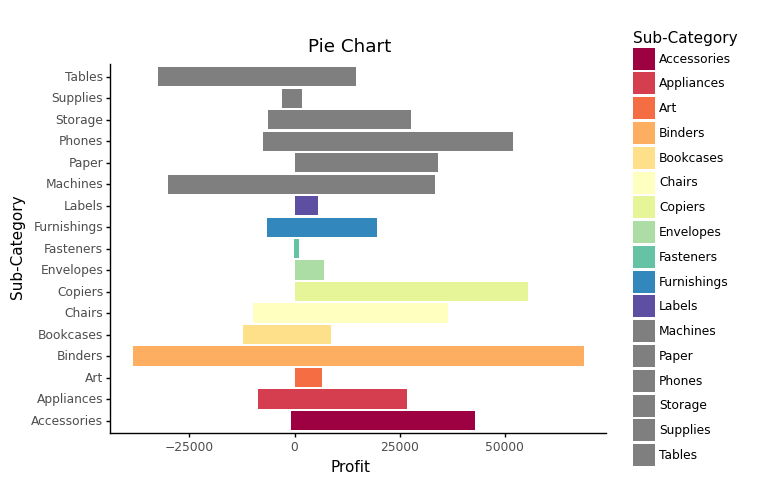

<ggplot: (179309431799)>

In [25]:
Profit_plot = (ggplot(df,aes(x='Sub-Category', y='Profit', fill='Sub-Category'))+geom_col()+coord_flip()
+ scale_fill_brewer(type='div',palette="Spectral") + theme_classic()+ggtitle('Pie Chart'))

display(Profit_plot)

#### STATE WISE DISCOUNT PROFIT SALES

In [26]:
df_State = df.groupby('State')[['Profit', 'Sales', 'Discount']].mean()
df_State.head(10)

,Profit,Sales,Discount
State,,,
Alabama,94.865989,319.846557,0.000000
Arizona,-15.303235,157.508933,0.303571
Arkansas,66.811452,194.635500,0.000000
California,38.171608,228.729451,0.072764
Colorado,-35.867351,176.418231,0.316484
Connecticut,42.823071,163.223866,0.007317
Delaware,103.930988,285.948635,0.006250
District of Columbia,105.958930,286.502000,0.000000
Florida,-8.875461,233.612815,0.299347


Text(0.5, 1.0, 'States')

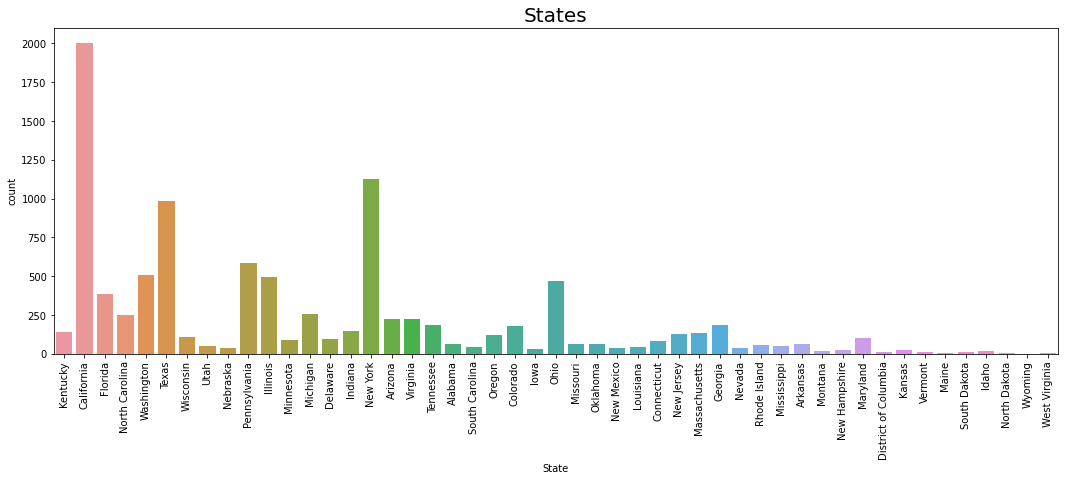

In [27]:
plt.figure(figsize = (18, 6))
sns.countplot(df['State'])
plt.xticks(rotation = 90)
plt.tight_layout
plt.title('States', fontsize = 20)

***From the above plot, we can make out the following observations***

***States having the highest number of Sales***

***1.) California***

***2.) New York***

***3.) Texas***

***State having the least number of Deals***

***1.) Wyoming***

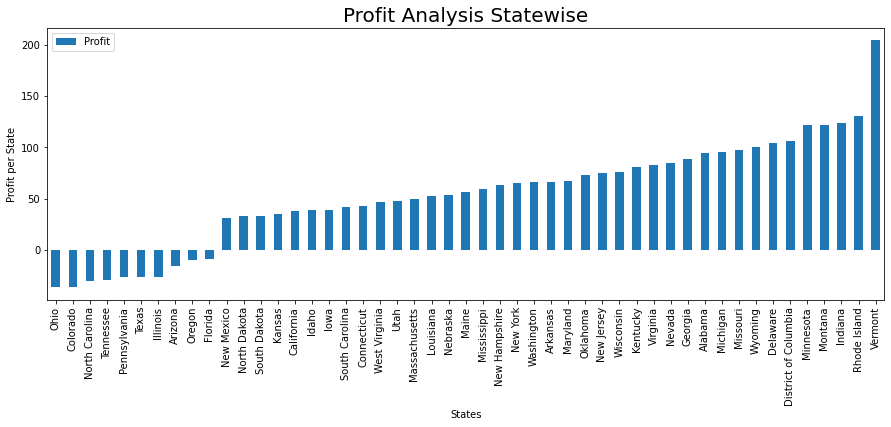

In [28]:
df2 = df_State.sort_values('Profit')

df2['Profit'].plot(kind = 'bar', figsize = (15,5))
plt.xlabel('States')
plt.ylabel('Profit per State')
plt.title('Profit Analysis Statewise', fontsize = 20)
plt.legend()

**From the above plot, we can make out the highest profit per state as well as the lowest**

Highest Profit State 1.) Vermount

Lowest Profit State 2.) Ohio

#### CITY WISE DISCOUNT PROFIT SALES ANALYSIS

In [29]:

df_city = df['City'].value_counts()
df_city.head(10)

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Houston          377
Chicago          314
Columbus         222
San Diego        170
Springfield      163
Name: City, dtype: int64

In [31]:
df_city.mean()

18.821092278719398

In [32]:
df_city = df.groupby(['City'])[['Profit', 'Sales', 'Discount']].mean()
df_city = df_city.sort_values('Profit')
df_city.head(10)

,Profit,Sales,Discount
City,,,
Bethlehem,-200.619160,337.926800,0.380000
Champaign,-182.352000,151.960000,0.600000
Oswego,-178.709200,107.326000,0.600000
Round Rock,-169.061614,693.436114,0.274286
Lancaster,-157.371052,215.031826,0.315217
Clarksville,-150.764743,316.818571,0.271429
Medina,-149.227178,275.302444,0.433333
Burlington,-144.915088,866.723280,0.136000
San Antonio,-123.712715,370.229288,0.383051


Text(0.5, 1.0, 'City-wise analysis of Profit')

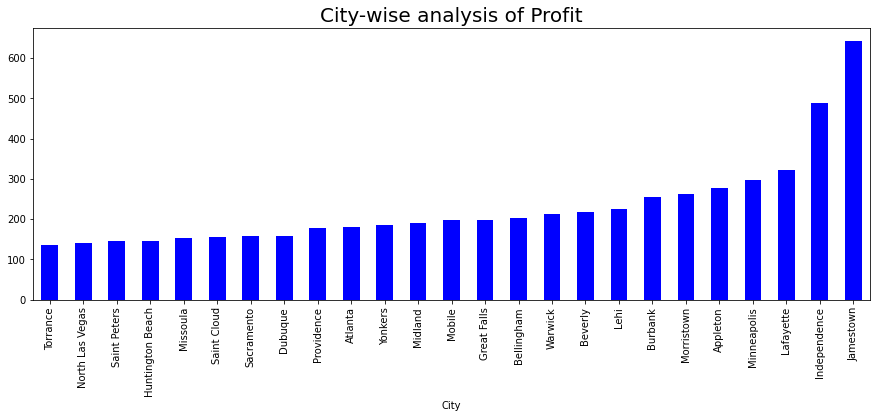

In [34]:
df_city['Profit'].tail(25).plot(kind = 'bar', figsize = (15, 5), color = 'blue')
plt.title('City-wise analysis of Profit', fontsize = 20)

Text(0.5, 1.0, 'City-wise analysis of Loss')

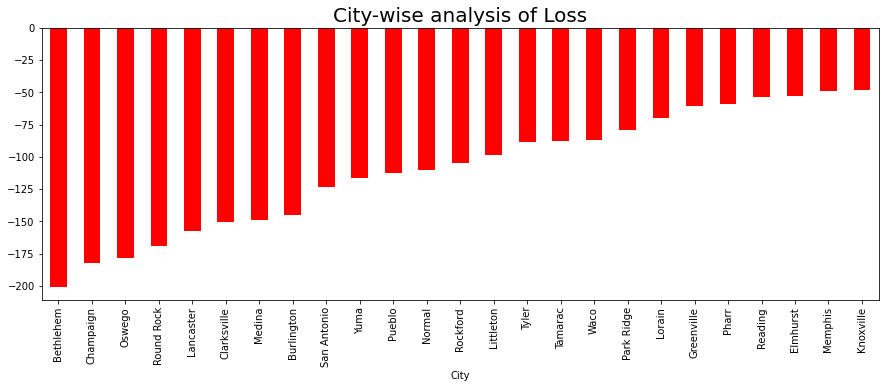

In [50]:
df_city['Profit'].head(25).plot(kind = 'bar', figsize = (15, 5), color = 'red')
plt.title('City-wise analysis of Loss', fontsize = 20)

#### Quantity wise Sales Profit and Discount Aalysis

In [36]:
df_quantity = df.groupby('Quantity')[['Profit', 'Sales', 'Discount']].mean()
df_quantity

,Profit,Sales,Discount
Quantity,,,
1,8.276396,59.234632,0.152959
2,16.006831,120.354488,0.154858
3,23.667715,175.201578,0.153329
4,37.131310,271.764059,0.157708
5,40.257394,337.936339,0.157146
6,18.051517,362.101960,0.166556
7,56.579163,395.888393,0.161980
8,42.244342,458.210802,0.171595
9,68.557716,498.083683,0.147946


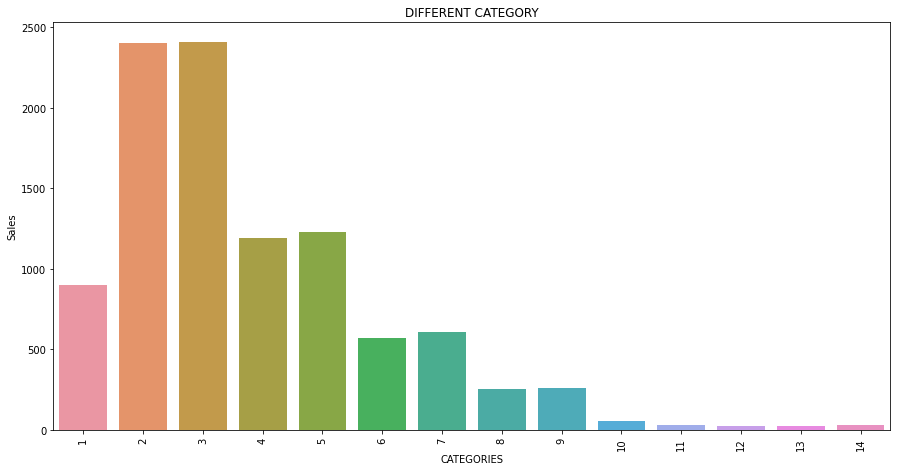

In [37]:
plt.figure(figsize=(15,7.5))
sns.countplot(x=df1['Quantity'])
plt.xticks(rotation=90)
plt.title("DIFFERENT CATEGORY")
plt.xlabel("CATEGORIES")
plt.ylabel("Sales")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

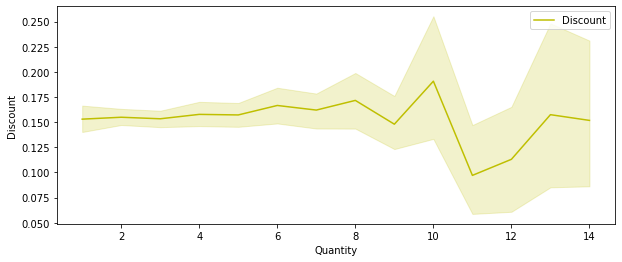

In [38]:
plt.figure(figsize=(10,4))
sns.lineplot('Quantity','Discount',data=df1,color='y',label='Discount')
plt.legend()
plt.show

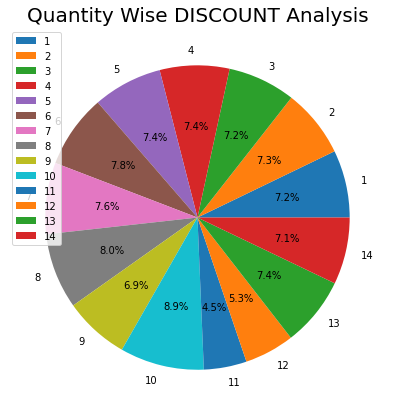

In [53]:
plt.figure(figsize = (7,7))
plt.pie(df_quantity['Discount'], labels = df_quantity.index, autopct = '%1.1f%%')
plt.title('Quantity Wise DISCOUNT Analysis', fontsize = 20)
plt.legend()
plt.xticks(rotation = 90)
plt.show()


#### REGION WISE SALES PROFIT AND DISCOUNT ANALYSIS

In [40]:
df_regions = df.groupby('Region')[['Profit', 'Sales', 'Discount']].mean()
df_regions

,Profit,Sales,Discount
Region,,,
Central,17.092709,215.772661,0.240353
East,32.135808,238.336110,0.145365
South,28.857673,241.803645,0.147253
West,33.849032,226.493233,0.109335


array([<AxesSubplot:ylabel='Profit'>, <AxesSubplot:ylabel='Sales'>,
       <AxesSubplot:ylabel='Discount'>], dtype=object)

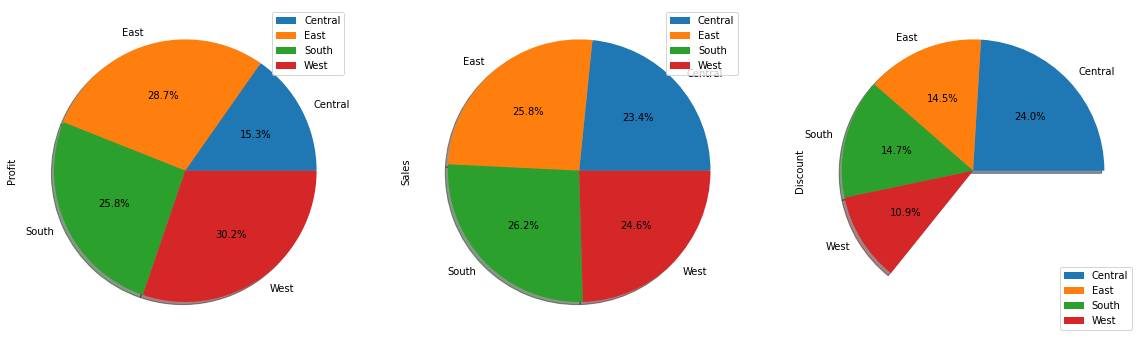

In [41]:
df_regions.plot(kind = 'pie', shadow = True, subplots = True, autopct = '%1.1f%%', figsize = (20, 20))

#### ANALYIS BY MODE OF SHIPPING

In [42]:
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [43]:
df_ship_mode = df.groupby('Ship Mode')[['Profit', 'Sales', 'Discount']].mean()
df_ship_mode

,Profit,Sales,Discount
Ship Mode,,,
First Class,31.839948,228.497024,0.164610
Same Day,29.266591,236.396179,0.152394
Second Class,29.535545,236.089239,0.138895
Standard Class,27.494770,227.583067,0.160023


array([<AxesSubplot:ylabel='Profit'>, <AxesSubplot:ylabel='Sales'>,
       <AxesSubplot:ylabel='Discount'>], dtype=object)

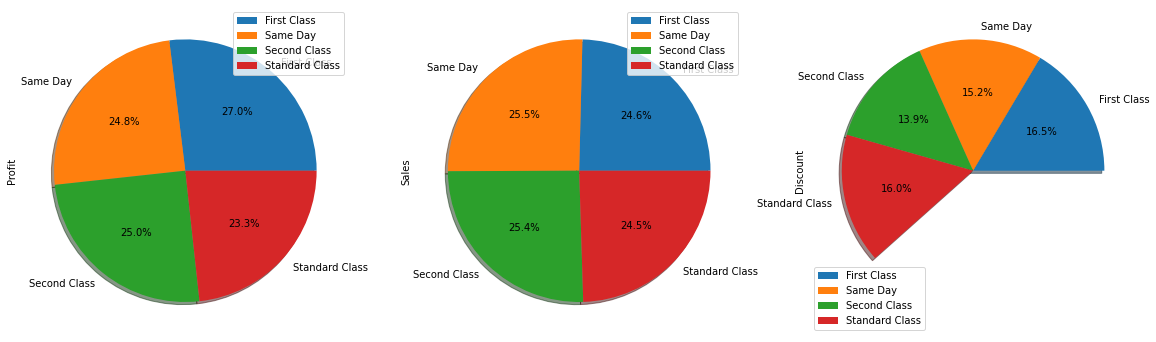

In [44]:
df_ship_mode.plot(kind = 'pie', figsize = (20, 20), autopct = '%1.1f%%', shadow = True, subplots = True)

## CONCLUSION

#### THINGS THAT CAN BE DONE TO IMPROVE THE SALES

1-Heavy Discount should not be affected in any Category

2-Discount range should be between 0.0-0.3

3-Furniture category is the most poor performing category and no discount should be offered in this category

3-Furniture category can be taken into consideration for closing as it is not making much profit even at lower discount

4-Central region should not offer any kind of discount for better performance

5-Office supplies performs better when 0.2 discount is given.So that much discount should be given in every region for the particular category